<h1><center><font color='blue'>Predict Heart Failure</font></center></h1>

shwyt shar7 ll dataset

## Explore:

In [2]:
import pandas as pd
import os 

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> We notice that FastingBs, ExerciseAngina and HeartDisease can be of boolean type.

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
for col in df.columns:
    print(col+': ')
    print(df[col].unique())

Age: 
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex: 
['M' 'F']
ChestPainType: 
['ATA' 'NAP' 'ASY' 'TA']
RestingBP: 
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol: 
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

> We notice that one value for Cholesterol is zero which can't be valid.

 ## Changes: 
 1- change columns' names
 
 2- drop the row containing 0 value for serum cholesterol
 
 3- drop the row containing 0 value for resting blood pressure cholesterol
 
 4- change datatypes of previously mentioned rows into boolean.

In [9]:
new_columns=['age','sex','chest_pain','resting_bp','cholesterol','fasting_bs','resting_ecg','max_hr','exercise_angina'
            ,'oldpeak','st_slope','heart_disease']

In [10]:
df.columns=new_columns

In [11]:
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs',
       'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak', 'st_slope',
       'heart_disease'],
      dtype='object')

In [12]:
df[df['cholesterol']==0]

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


> Oopsiii!! Shakl el 0 cholesterol da 3ady wla eh?

In [13]:
df[df['resting_bp']==0]
# linear regression for missing cholesterol values 
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=0, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df2=imp.fit_transform(df.loc[:,['cholesterol']])
df['cholesterol']=df2

In [14]:
df=df.drop(df.index[449])

In [15]:
df[df['resting_bp']==0]

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease


In [16]:
# #df['fasting_bs'] = df['fasting_bs'].replace([0,1],[False,True])
# df['exercise_angina']=df['exercise_angina'].replace(['False','True'],[1,0])
# #df['heart_disease']=df['heart_disease'].replace([1,0],[True,False])
# df['chest_pain']=df['chest_pain'].replace(['NAP','ATA','TA','ASY'],[0,1,2,3])
# df['sex']=df['sex'].replace(['M','F'],[1,0])
# df['resting_ecg']=df['resting_ecg'].replace(['Normal','ST','LVH'],[0,1,2])
# df['st_slope']=df['st_slope'].replace(['Up','Flat','Down'],[0,1,2])



In [17]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## Redifining DataFrame

In [18]:
numerical = ['age','resting_bp','cholesterol','max_hr','oldpeak']
categorical = ['sex','chest_pain','fasting_bs','resting_ecg','st_slope','exercise_angina']

## Shoghl el ML

In [19]:
df_data=df

In [20]:
y=df_data.heart_disease

In [21]:
x=df_data[numerical+categorical]
# we have to encode caterogical data into numbers first before we start working with the model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['chest_pain'] = le.fit_transform(df['chest_pain'])
df['chest_pain'] = le.fit_transform(df['chest_pain'])
df['resting_ecg'] = le.fit_transform(df['resting_ecg'])
df['st_slope'] = le.fit_transform(df['st_slope'])
df['exercise_angina'] = le.fit_transform(df['exercise_angina'])



df.head()
x=df.drop(['heart_disease'], axis=1)
y=df.heart_disease
df.head()




,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [22]:
from sklearn.model_selection import train_test_split 
#splitting the data for trainging and testing
train_x, val_x, train_y, val_y = train_test_split(x, y,test_size=0.3,random_state = 0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state = 0)



In [24]:
model.fit(train_x,train_y)
y_pred=model.predict(val_x)

In [25]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))


Accuracy: 0.8659420289855072


In [26]:
# we have almost 87% accuracy with deafult parameters for the model 
# we will try to choose some values for some parameters to yield a better score 
# as a rule of thumb _estimators should be 10X your input parameters so we will explore options around that 
# a grid will be created to try values for different parameters some based on rules and some by trials 
# different combinations will be applied and we will choose the combination with the best score from grid search

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [50,100,110,150],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,'none'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': [1,2,3]
}
rf = RandomForestClassifier(random_state = 0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1)


In [28]:
grid_results=grid_search.fit(train_x,train_y)
grid_results.best_score_


C:\Users\Mohamed Salman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85181483 0.84245924 0.84556483 0.84243983 0.84868983 0.84244953
 0.84555512 0.84243012 0.85648292 0.84555512 0.84711762 0.84398292
 0.85181483 0.84245924 0.84556483 0.84243983 0.84868983 0.84244953
 0.84555512 0.84243012 0.85648292 0.84555512 0.84711762 0.84398292
 0.84868983 0.84871894 0.85027174 0.85026203 0.85335792 0.85025233
 0.85181483 0.85181483 0.85492042 0.85182453 0.85182453 0.85338703
 0.84868983 0.84871894 0.85027174 0.85026203 0.85335792 0.85025233
 0.85181483 0.85181483 0.85492042 0.85182453 0.85182453 0.85338703
 0.84869953 0.85962733 0.85650233 0.85651203 0.84869953 0.84402174
 0.84402174 0.84868983 0.85181483 0.85494953 0.85651203 0.85649262
 0.84869953 0.85962733 0.85650233 0.85651203 0.84869953 0.84402174
 0.84402174 0.84868983 0.85181483 0.85494953 0.85651203 0.85649262
 0.85493012 0.85495924 0.85338703 0.85807453

0.8596273291925466

In [29]:
print(grid_search.best_params_)
bestmodel= grid_results.best_estimator_
bestmodel.fit(train_x,train_y)
y_pred=bestmodel.predict(val_x)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))






{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
Accuracy: 0.8514492753623188


In [64]:
# notice we got a lower accuracy on our test set than the grid serach did on testing with the train test 
# this happens because it tests on the training data ( data is divided into cv folds and tested per those folds)
# now we will try tuning the hyper parameters considering we got an idea of how accuracy
# changes with some trials on grid search  
# the model was tuned according to our grid search results and machine learning best practices 
# https://machinelearningmastery.com/random-forest-ensemble-in-python/

tunedmodel= RandomForestClassifier(random_state = 0, max_depth=6, criterion ='entropy',
                                 n_estimators=150)
tunedmodel.fit(train_x,train_y)
y_pred=tunedmodel.predict(val_x)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))


Accuracy: 0.8768115942028986


[[104  17]
 [ 17 138]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       121
           1       0.89      0.89      0.89       155

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



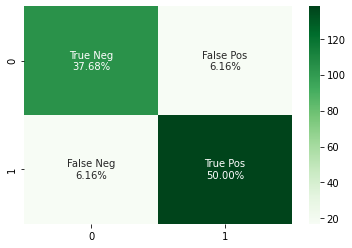

In [65]:
# classification results
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
CM = confusion_matrix(val_y,y_pred )
print(CM)

# Visualize it as a heatmap
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     CM.flatten()/np.sum(CM)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM, annot=labels, fmt="", cmap='Greens')
print(classification_report(val_y, y_pred))
# we have good f1 scores for both classes 

<AxesSubplot:>

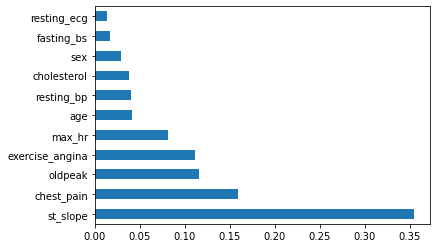

In [32]:
feature_scores = pd.Series(tunedmodel.feature_importances_, index=train_x.columns).sort_values(ascending=False)
feature_scores
feature_scores.plot(kind='barh')

In [34]:
df

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
